In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from copy import deepcopy

# Data

In [2]:
def dataset1(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax]
    return np.array(X).reshape(-1, 1)

In [3]:
N_tot = 20000
X = dataset1(period=2000, N_tot=N_tot)
T = np.arange(len(X))

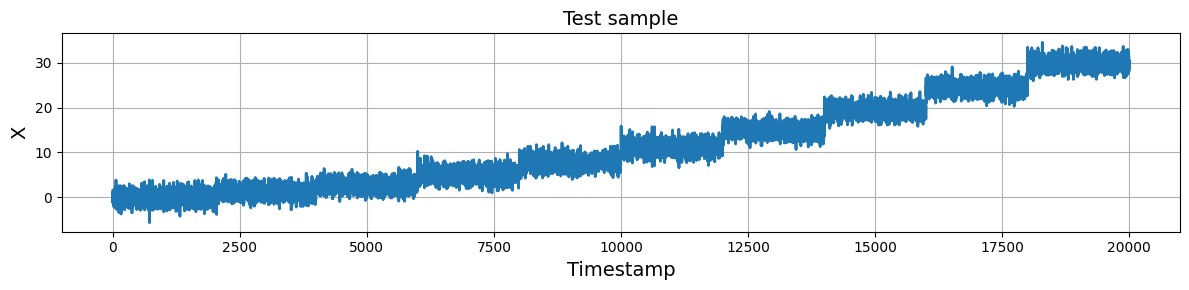

In [4]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X[:, 0], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()

# Change point detection

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import algorithms

In [6]:
clf = QuadraticDiscriminantAnalysis()
cpd = algorithms.ChangePointDetectionClassifier(base_classifier=clf, metric="KL_sym", periods=10, 
                                                window_size=500, step=10, n_runs=1)

T_score, score = cpd.predict(X)

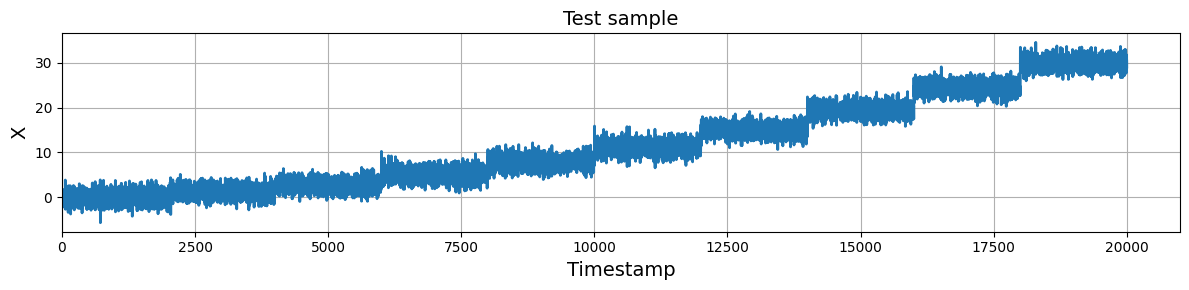

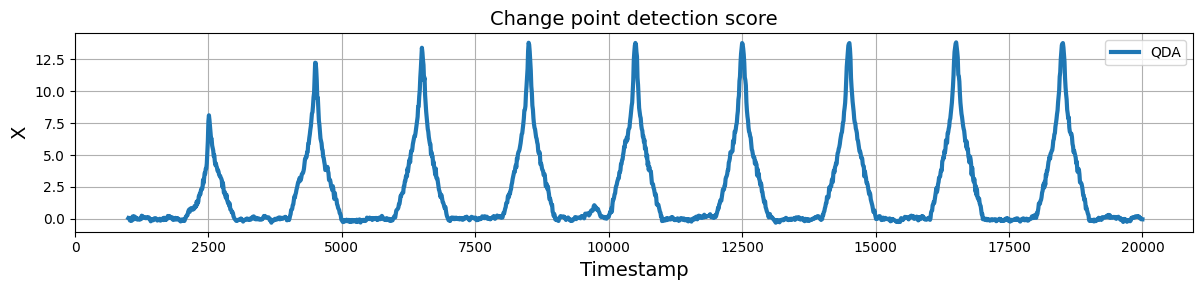

In [7]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X, linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.xlim(0)
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T_score, score, linewidth=3, label="QDA")

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0)
plt.show()

[  999  1009  1019 ... 19979 19989 19999]
[ 0.05899986  0.03387954  0.07404373 ... -0.03715661 -0.02619387
 -0.03087465]
Top 10 values: [13.817509036486225, 13.785857486945348, 13.771057407891941, 13.762401668348177, 13.762218116070965, 13.761892879421097, 13.711944964191519, 13.706950923368716, 13.706388997942417, 13.654848257763813]
Corresponding indexes: [16509, 8499, 10499, 12499, 14509, 18509, 16499, 18499, 14499, 12509]


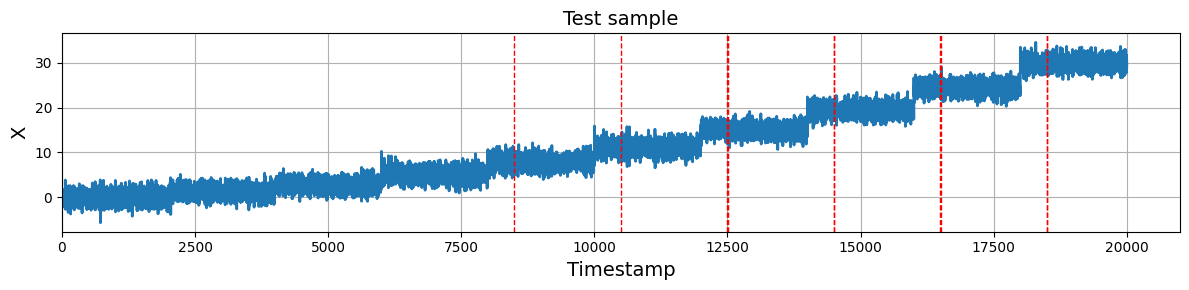

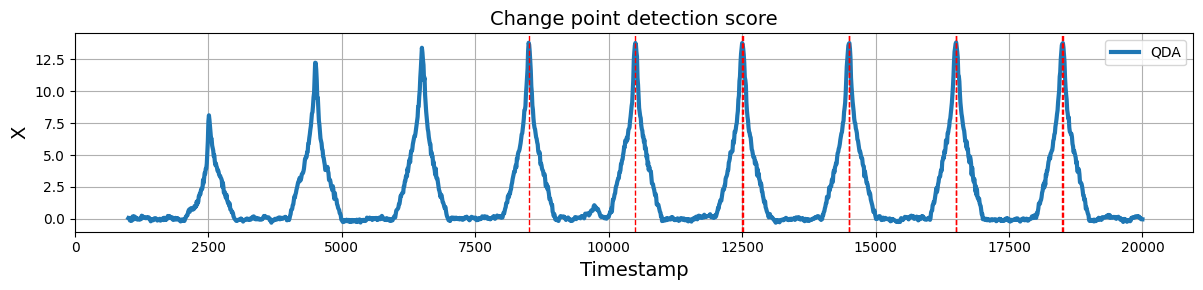

In [12]:
print(T_score)
print(score)
print

sorted_pairs = sorted(zip(T_score, score), key=lambda x: x[1], reverse=True)

# Take the first 10 pairs for the largest 10 values
top_10_pairs = sorted_pairs[:10]

# Separate the indexes and values for clarity
top_10_indexes = [index for index, value in top_10_pairs]
top_10_values = [value for index, value in top_10_pairs]

# Print the results
print("Top 10 values:", top_10_values)
print("Corresponding indexes:", top_10_indexes)

import matplotlib.pyplot as plt

# Assuming T, X, T_score, and score are defined somewhere in your code
# Assuming top_10_indexes is the list of indexes for the top 10 values you obtained earlier

# Display test sample with vertical lines for top 10 indexes
plt.figure(figsize=(12, 3.))
plt.plot(T, X, linewidth=2)
for index in top_10_indexes:
    plt.axvline(x=index, color='r', linestyle='--', linewidth=1)  # Add vertical line at each index
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.xlim(0)
plt.show()

# Display change point detection score with vertical lines for top 10 indexes
plt.figure(figsize=(12, 3.))
plt.plot(T_score, score, linewidth=3, label="QDA")
for index in top_10_indexes:
    plt.axvline(x=index, color='r', linestyle='--', linewidth=1)  # Add vertical line at each index
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0)
plt.show()
